# Lab Assignment 02

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pydicom

# Question 1

## a) Read, Display and write any color image in other formats.

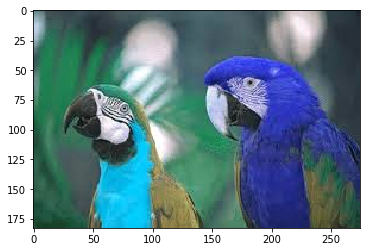

(183, 275, 3)

In [14]:
img = cv2.imread("download.jpg")
plt.imshow(img, cmap=plt.cm.bone)
plt.show()
img.shape

In [5]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

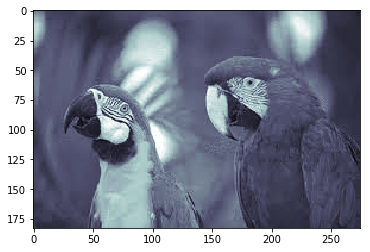

(183, 275)

In [36]:
plt.imshow(img1, cmap=plt.cm.bone)
plt.show()
img1.shape

## b) Find RED, GREEN and BLUE plane of the color image.

In [37]:
r,c,p = img.shape
temp1 =np.zeros((r,c,p),np.uint8)
temp2 =np.zeros((r,c,p),np.uint8)
temp3 =np.zeros((r,c,p),np.uint8)
temp1[:,:,0] = img[:,:,0]
temp2[:,:,1] = img[:,:,1]
temp3[:,:,2] = img[:,:,2]

Red


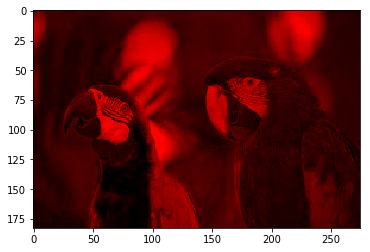

In [43]:
plt.imshow(temp1, cmap=plt.cm.bone)
plt.show()

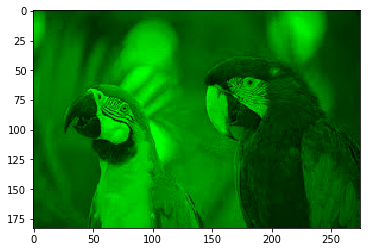

In [44]:
plt.imshow(temp2, cmap=plt.cm.bone)
plt.show()

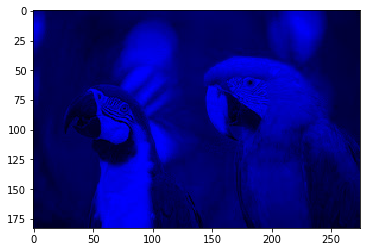

In [45]:
plt.imshow(temp3, cmap=plt.cm.bone)
plt.show()

## c) Convert color image into gray scale image and binary image.

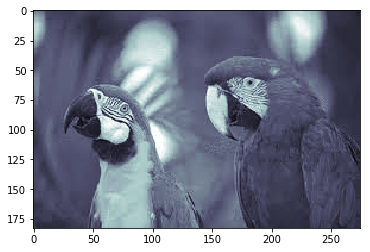

(183, 275)

In [46]:
plt.imshow(img1, cmap=plt.cm.bone)
plt.show()
img1.shape

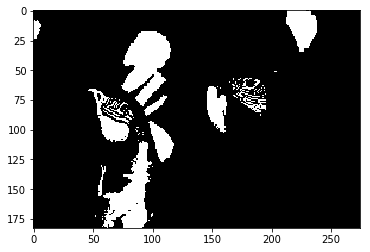

In [52]:
r, binimg = cv2.threshold(img1,183,275,cv2.THRESH_BINARY)
plt.imshow(binimg, cmap = plt.cm.bone)
plt.show()

## d) Resize the image by one half and one quarter.

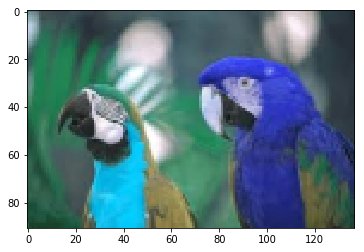

(91, 137, 3)

In [130]:
scale_percent = 50
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized, cmap = plt.cm.bone)
plt.show()
resized.shape

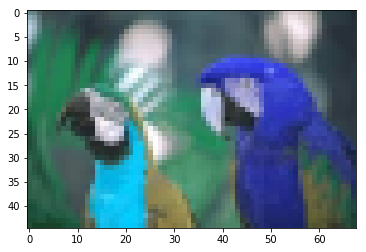

(45, 68, 3)

In [131]:
scale_percent = 25
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
resized1 = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized1, cmap = plt.cm.bone)
plt.show()
resized1.shape

## e) Image rotates by 45, 90 and 180 degrees.

In [108]:
(h, w) = img1.shape[:2]
center = (w / 2, h / 2)

M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated45 = cv2.warpAffine(img1, M, (w,h))
M = cv2.getRotationMatrix2D(center, 90, 1.0)
rotated90 = cv2.warpAffine(img1, M, (w,h))
M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated180 = cv2.warpAffine(img1, M, (w, h))

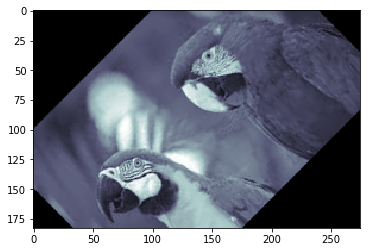

In [109]:
plt.imshow(rotated45, cmap = plt.cm.bone)
plt.show()

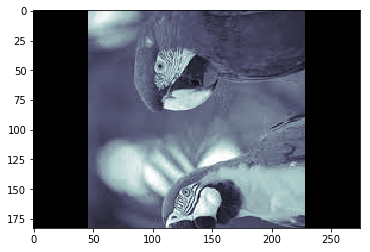

In [110]:
plt.imshow(rotated90, cmap = plt.cm.bone)
plt.show()

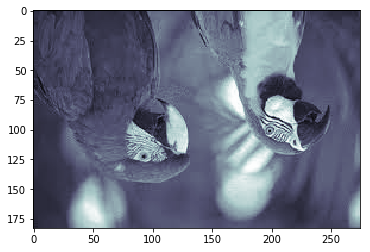

In [111]:
plt.imshow(rotated180, cmap = plt.cm.bone)
plt.show()

# Question 2

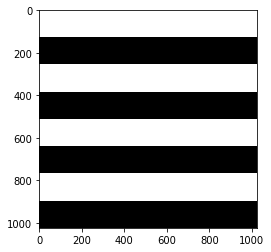

In [25]:
A = np.zeros((1024,1024))
#plt.imshow(i)
#plt.show()

ab = 1
i,j = 0,0
while(i<1024):
    for j in range(1024):
        A[i][j] = 1
    i += 1  
    if(i==ab*128):
        i += 128
        ab += 2
        
plt.imshow(A, cmap=plt.cm.bone)
plt.show()

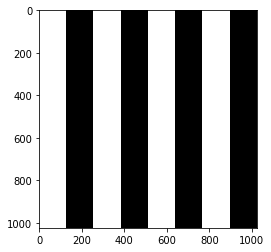

In [22]:
B = np.zeros((1024,1024))
c = 1
i,j = 0,0
while(i<1024):
    for j in range(1024):
        B[j][i] = 1
    i += 1  
    if(i==c*128):
        i += 128
        c += 2
        
plt.imshow(B, cmap=plt.cm.bone)
plt.show()

## a) Image addition of A and B

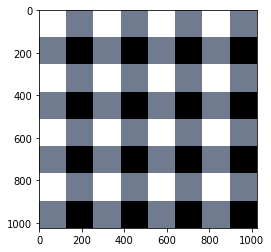

In [27]:
add = np.add(A,B)
plt.imshow(add, cmap=plt.cm.bone)
plt.show()

## b) Image addition of A and B

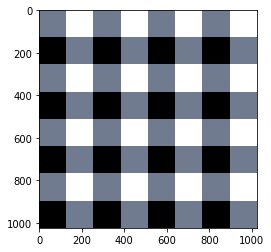

In [29]:
sub = np.subtract(A,B)
plt.imshow(sub, cmap=plt.cm.bone)
plt.show()

## c) Multiplication of A and B

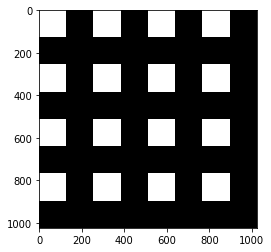

In [31]:
mul = np.multiply(A,B)
plt.imshow(mul, cmap=plt.cm.bone)
plt.show()

## d) Create a grayscale image of size 256x1024. Intensity of image should vary sinusoidal.

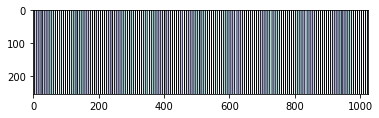

In [34]:
gi = np.zeros((256,1024))
for i in range(256):
    for j in range(1024):
        gi[i][j] = np.sin(j)
plt.imshow(gi, cmap=plt.cm.bone)
plt.show()

## e) Create a white image of size 256x256, with black box of size 58x58 at centre

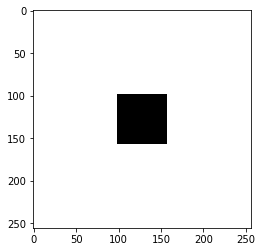

In [35]:
wibb = np.ones((256,256))
pad = (256-58)//2
for i in range(pad,(256-pad)):
    for j in range(pad,(256-pad)):
        wibb[i][j] = 0
        
plt.imshow(wibb, cmap=plt.cm.bone)
plt.show()

# Question 3

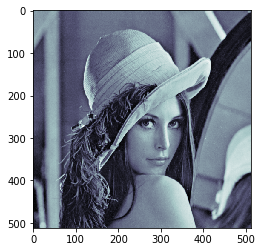

In [39]:
img = cv2.imread("lena_color.tiff")
lena = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(lena, cmap=plt.cm.bone)
plt.show()

## a) Image Negative

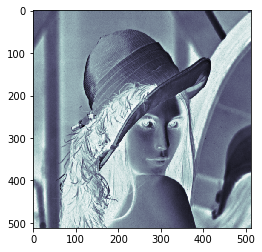

In [41]:
lenan = np.zeros((512,512))
for i in range(512):
    for j in range(512):
        lenan[i][j] = (255 - lena[i][j])
plt.imshow(lenan, cmap = plt.cm.bone)
plt.show()

## b) Log transformation and inverse log transform: s = c log (1+r), c is a const, r ≥ 0. s is pixel intensity of output image, r is the pixel intensity of input image. Study the effect of constant c on the quality of output image.

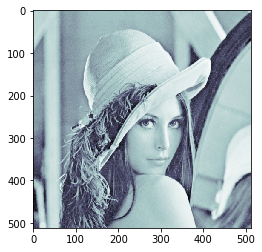

In [43]:
lenal = np.zeros((512,512))
c = 1
for i in range(512):
    for j in range(512):
        lenal[i][j] = c*np.log(1+lena[i][j])
plt.imshow(lenal, cmap=plt.cm.bone)
plt.show()

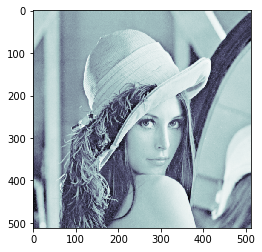

In [53]:
lenail = np.zeros((512,512))
c = 1
for i in range(512):
    for j in range(512):
        lenail[i][j] = (lena[i][j])**(np.log(256) / (255)) - 1
plt.imshow(lenail, cmap=plt.cm.bone)
plt.show()

## c) Power law transformation: Study the effect of different values of Gamma used in this transformation.


For Gamma:  1


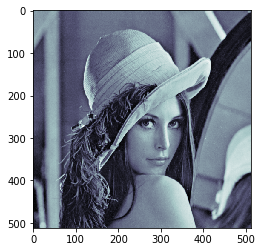


For Gamma:  2


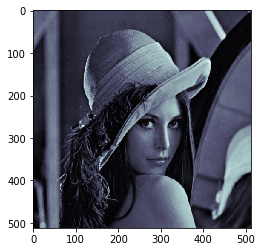


For Gamma:  3


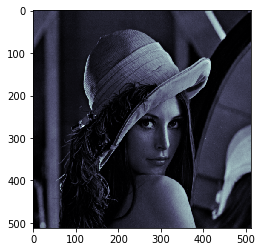


For Gamma:  4


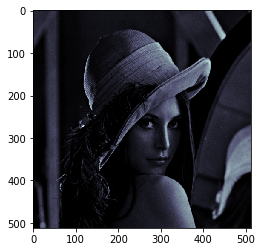


For Gamma:  5


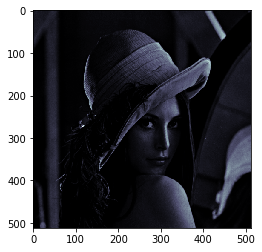


For Gamma:  6


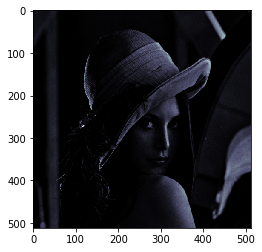


For Gamma:  7


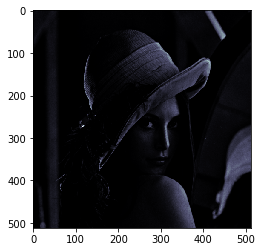


For Gamma:  8


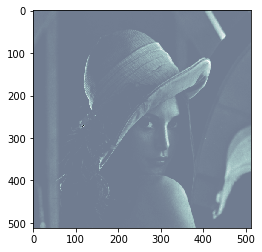


For Gamma:  9


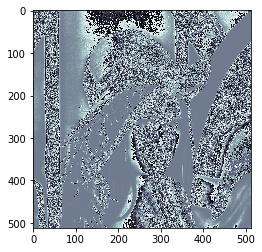


For Gamma:  10


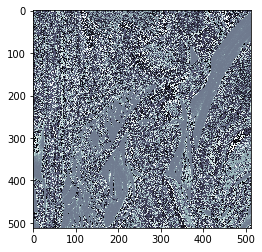

In [44]:
lenap = np.zeros((512,512))
c = 1
for k in range(1,11):
    for i in range(512):
        for j in range(512):
            lenap[i][j] = c*(lena[i][j])**k
    print("\nFor Gamma: ",k)
    plt.imshow(lenap, cmap=plt.cm.bone)
    plt.show()

## d) Contrast stretching

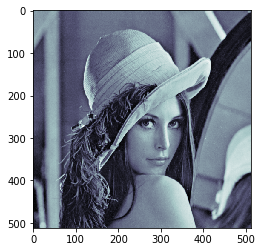

In [49]:
a = 0
b = 255
c = np.amin(lena)
d = np.amax(lena)
lenacs = np.zeros((512,512))
c = 1
for i in range(512):
    for j in range(512):
        lenacs[i][j] = (lena[i][j]-c)*((b-a)/(d-c))+a
        
plt.imshow(lenacs, cmap=plt.cm.bone)
plt.show()

## e) Gray level slicing

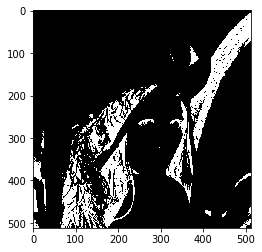

In [51]:
min_range = 10
max_range = 60
lenas = np.zeros((512,512))
for i in range(512):
    for j in range(512):
        if imgg[i,j]>min_range and imgg[i,j]<max_range:
            lenas[i,j] = 255
        else:
            lenas[i,j] = 0
            
plt.imshow(lenas, cmap=plt.cm.bone)
plt.show()